# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('D:/Studing DATA/Model_python/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [4]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

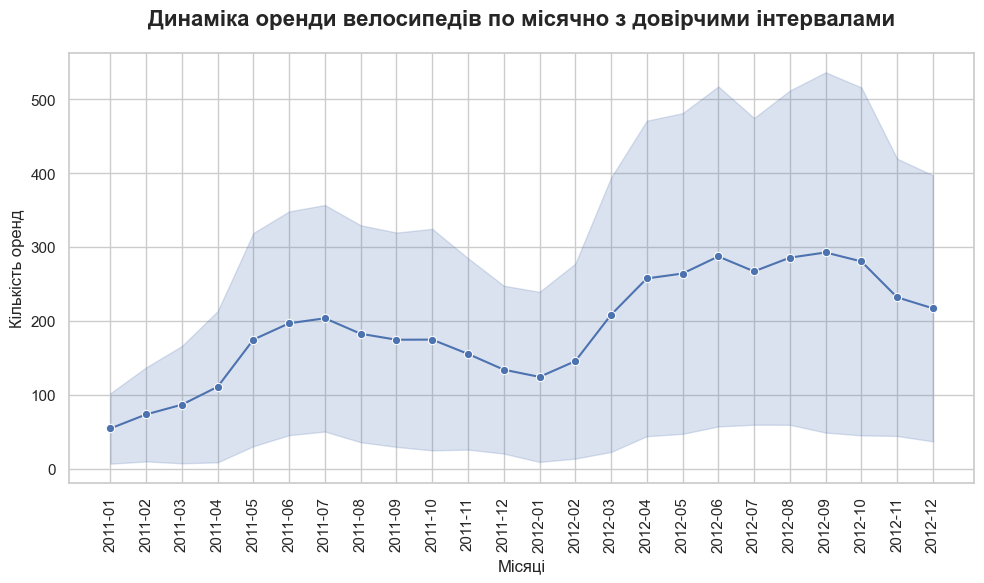

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(df, x='month_year', y='count', errorbar='sd',marker="o")
plt.title('Динаміка оренди велосипедів по місячно з довірчими інтервалами',fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Місяці')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=90) # краще видно до якої з осей підпис Х
plt.tight_layout();

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?
- в 2011 році це літні місяці 6,7(червень липень). в 2012 - це 6 і 9 (червень,вересень)
  

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

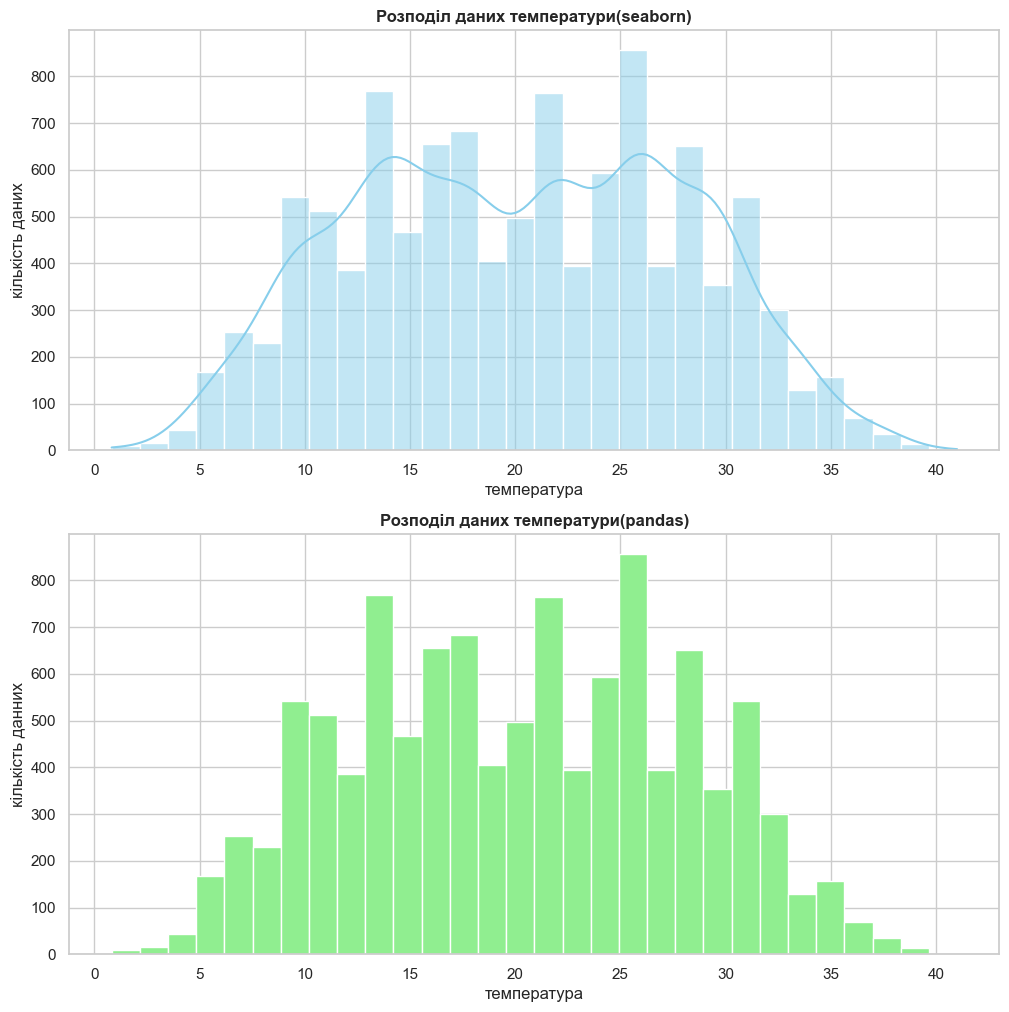

In [6]:
plt.figure(figsize=(12, 12))

# seaborn графік
plt.subplot(2, 1, 1)
sns.histplot(df['temp'],bins=30, color='skyblue',kde=True)
plt.title('Розподіл даних температури(seaborn)',fontweight='bold')
plt.xlabel('температура')
plt.ylabel('кількість даних')

# pandas графік
plt.subplot(2, 1, 2)
plt.hist(df['temp'],bins=30, color='lightgreen')
plt.title('Розподіл даних температури(pandas)',fontweight='bold')
plt.xlabel('температура')
plt.ylabel('кількість данних');



**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
  * Відмінність тільки в візуальному оформленні , сіборн прозорий. А також я додала лінію КДЕ .
3. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?
  * це лінія КДЕ згладжена лінія гістогрми чи щось таке. показує усереднений розподіл данних.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

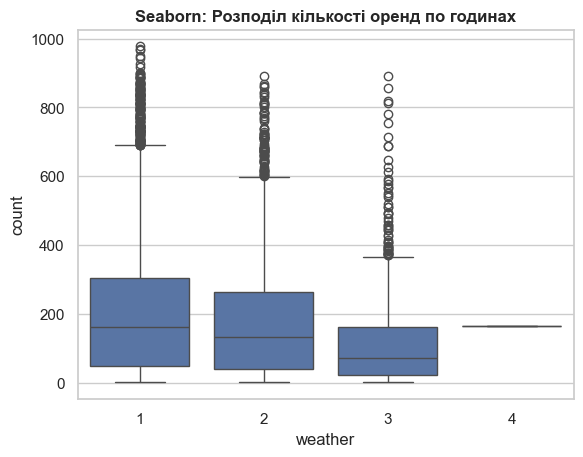

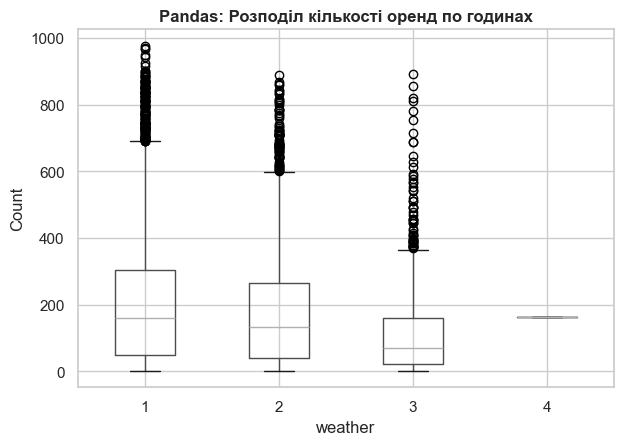

In [7]:
# --- 1. seaborn boxplot ---

sns.boxplot(data=df, x='weather', y='count')
plt.title("Seaborn: Розподіл кількості оренд по годинах",fontweight='bold')

# --- 2. pandas boxplot ---

df.boxplot(column='count', by='weather')
plt.title("Pandas: Розподіл кількості оренд по годинах",fontweight='bold')
plt.suptitle("")  
plt.xlabel("weather")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

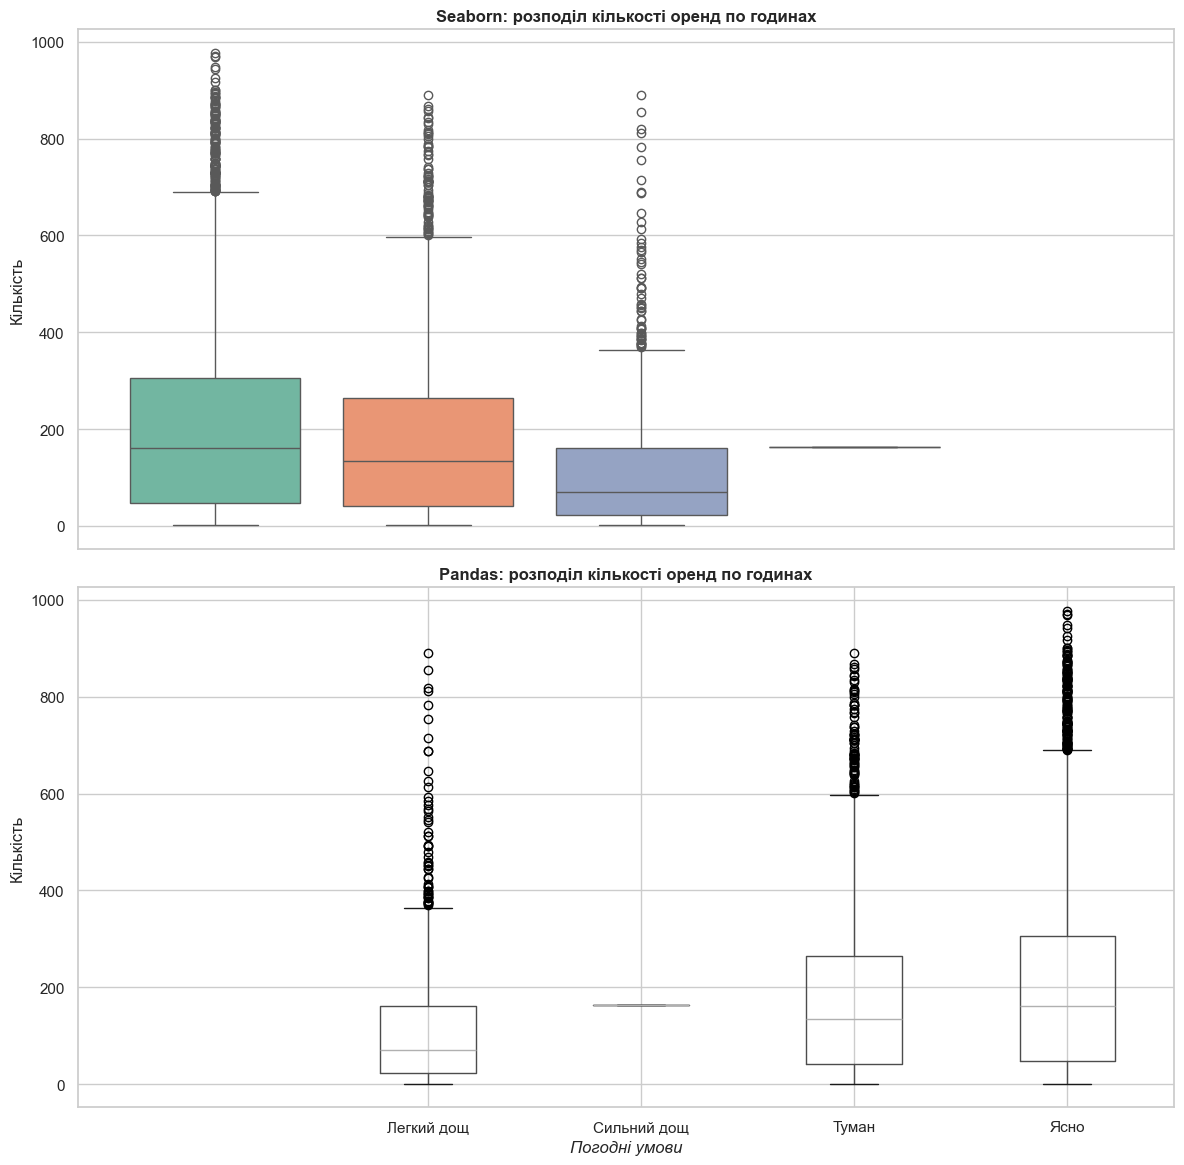

In [8]:
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_name'] = df['weather'].map(weather_map)

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

 # Seaborn 
sns.boxplot(data=df, x='weather_name', y="count", hue = 'weather_name',palette='Set2', ax=axes[0] )
axes[0].set_title("Seaborn: розподіл кількості оренд по годинах",fontweight='bold')
axes[0].set_xlabel("Погодні умови")   
axes[0].set_ylabel("Кількість")

#Легенда яка не працює
# handles, labels = axes[0].get_legend_handles_labels()
# axes[0].legend(handles, labels, title='Погода', loc='upper right') 



#  Pandas 
df.boxplot(column="count",by='weather_name', ax=axes[1])
axes[1].set_title("Pandas: розподіл кількості оренд по годинах",fontweight='bold')
plt.suptitle("")
plt.xlabel("Погодні умови",fontstyle="italic")
  
axes[1].set_ylabel("Кількість")

plt.tight_layout()
plt.show()



**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?
- Бокс плоти пандас мені навіть красивіші ніж сіборн, прозорі вузькі добре видно відмінності, сіборн в стандарті товcті, що мені особисто не допомагає сприймати інформацію, заповнені кольором. Не змогла вивести легенду(кольори- погода) може підкажете як?

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [15]:
non_na_penguins = df.dropna();

In [25]:
correlation = df[['count', 'temp', 'humidity', 'hour', 'atemp', 'windspeed']].corr()

In [26]:
correlation

,count,temp,humidity,hour,atemp,windspeed
count,1.000000,0.394454,-0.317371,0.400601,0.389784,0.101369
temp,0.394454,1.000000,-0.064949,0.145430,0.984948,-0.017852
humidity,-0.317371,-0.064949,1.000000,-0.278011,-0.043536,-0.318607
hour,0.400601,0.145430,-0.278011,1.000000,0.140343,0.146631
atemp,0.389784,0.984948,-0.043536,0.140343,1.000000,-0.057473
windspeed,0.101369,-0.017852,-0.318607,0.146631,-0.057473,1.000000


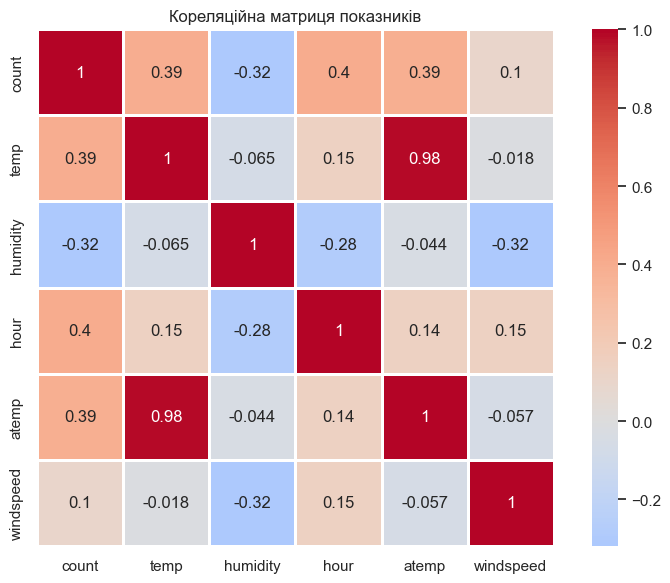

In [27]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?

* Найсильніший позитивний зв’язок: у різні години доби прокат коливається найбільше.( 0.4 Hour)
* Чим тепліше, тим більше оренд.(0.39 temp)
* «Відчувана» температура поводиться так само, що логічно.(0.39 atemp)
* Висока вологість зменшує попит на велосипеди.(-0.32 humidity)

##### Отже, час доби (hour) є найкращим одиничним предиктором, а температура — другим.



2. Яка кореляція між temp та atemp? Чому?
 * Коефіцієнт 0,98 означає майже лінійну залежність. Бо відчувана температура це напевно не чисто виміряна температура, а температура з деякими ще показниками вологість , атмо тиск чи щось таке.
3. Які змінні мають негативну кореляцію?
   * Змінна вологості. Найбільший «стримувальний» чинник — висока вологість.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


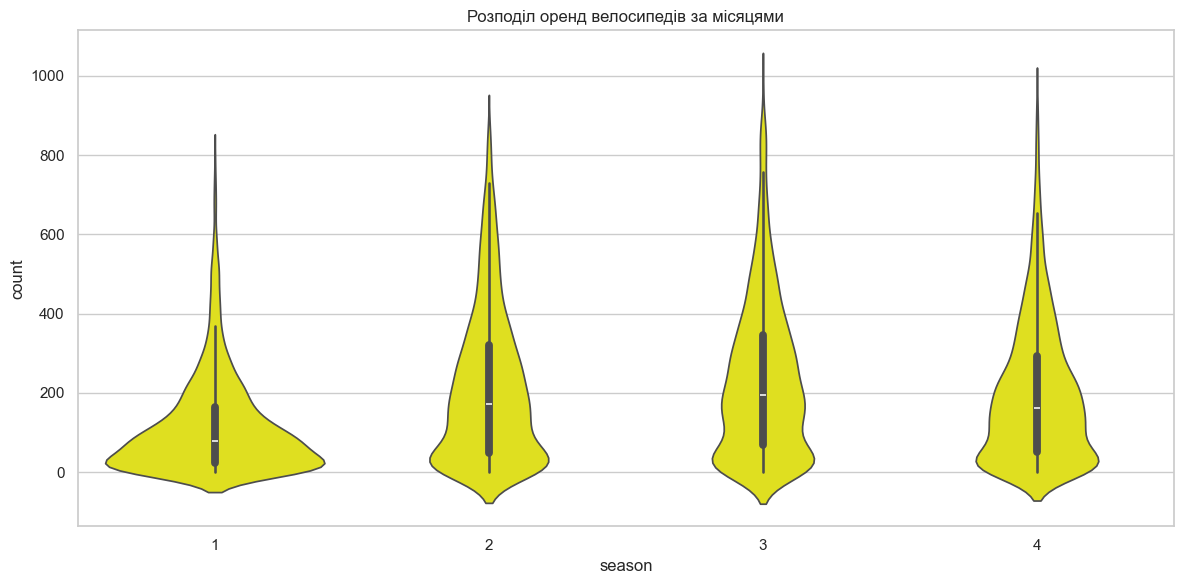

In [11]:
plt.figure(figsize=(12, 6))
sns.violinplot(df, x='season', y='count', color='yellow'
               # order=[1 == 'Зима',2 ==  'Весна', 3 =='Літо', 4 =='Осінь']
)
               
plt.xticks(rotation=0)
plt.title('Розподіл оренд велосипедів за місяцями')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Seaborn: Розподіл кількості оренд по сезонах')

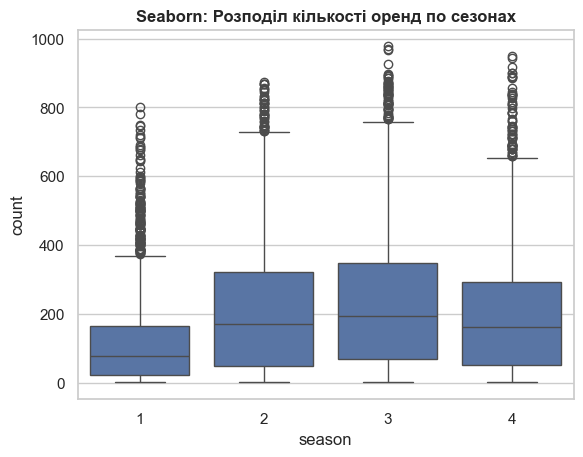

In [12]:
sns.boxplot(data=df, x='season', y='count')
plt.title("Seaborn: Розподіл кількості оренд по сезонах",fontweight='bold')



**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
   * На скільки я зрозуміла це валіон це розвернута гістограма тому товщина це кількіть данних,точніше діапазн де вони скупчені, типу найбільше данних в зимовий період це данні про оренди від 10 до 30, тому в цьому місці валіон широка і потiм іде на звуження. Де скрипка ширша, там спостережень із цим діапазоном значень найбільше.Де звужується — спостережень менше.
2. В якому сезоні найбільша варіабельність оренди?
   * Сезон 3 ( в мене це літо, бо ми по різному рахуємо сезони) тут так звана скрипка має найдовший хвостик це означає що в цьому сезоні найбільна кількість варіантів.
3. Яка перевага violin plot над звичайним box plot?
 * Особисто мені зараз важко оцінити переваги , бо я навіть до прикладу вивела бокс плот і він мені зрозуміліший, проте якщо можливо дадати порівняння то валіон плот буде логічнішим, наприклад порівняти мемберів і тих хто не має абонемента.
   

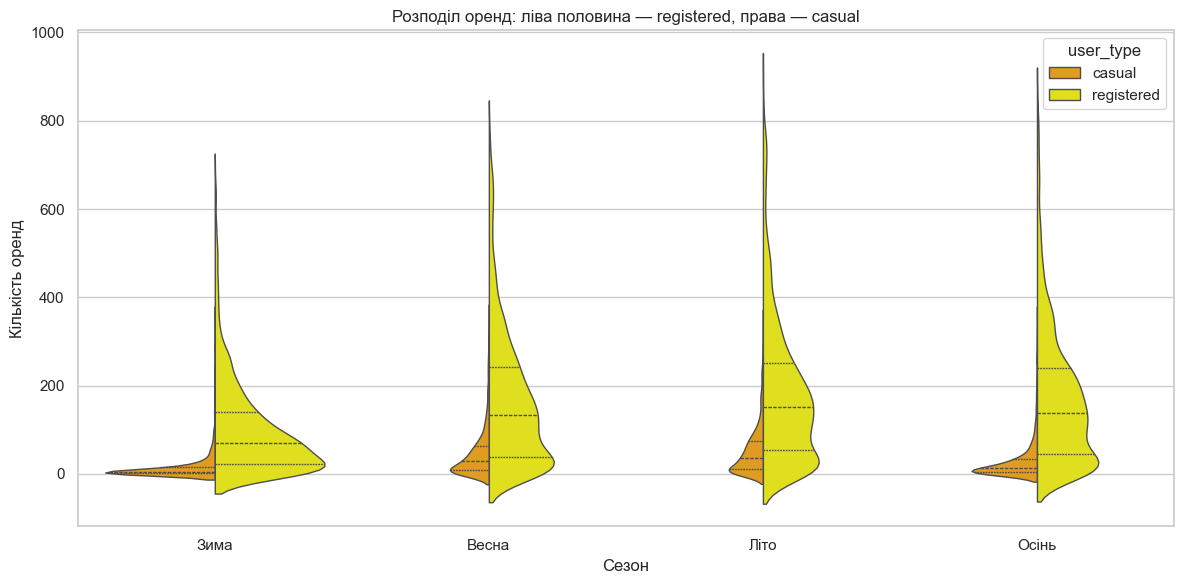

In [18]:
cols = ['season', 'casual', 'registered', 'count']
df_use = df[cols].copy()


df_long = df_use.melt(
    id_vars=['season', 'count'],          # лишаємо season і вже готовий count
    value_vars=['casual', 'registered'],  # саме їх поділимо ліво/право
    var_name='user_type',                 # нова колонка‑ідентифікатор
    value_name='part'                     # кількість casual або registered
)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_long,
    x='season',
    y='part',           # ← показуємо, скільки саме casual / registered
    hue='user_type',
    split=True,
    inner='quartile',
    palette={'registered': 'yellow', 'casual': 'orange'},
    linewidth=1
)

plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=['Зима', 'Весна', 'Літо', 'Осінь']
)
plt.ylabel('Кількість оренд')
plt.xlabel('Сезон')
plt.title('Розподіл оренд: ліва половина — registered, права — casual')
plt.tight_layout()
plt.show()


* Registered користувачі стабільні цілий рік, їх частка велика навіть узимку.

* Casual користувачі залежать від сезону: пік — літо, мінімум — зима.

* Максимальна активність — улітку (особливо серед casual).
    #### На основі цього графіка краще можна сформувати висновки які допоможуть маркетингу сформувати стратегію,і зрозуміти користувача.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

In [28]:
correlation2= df[['count', 'temp', 'humidity', 'windspeed', 'season']]

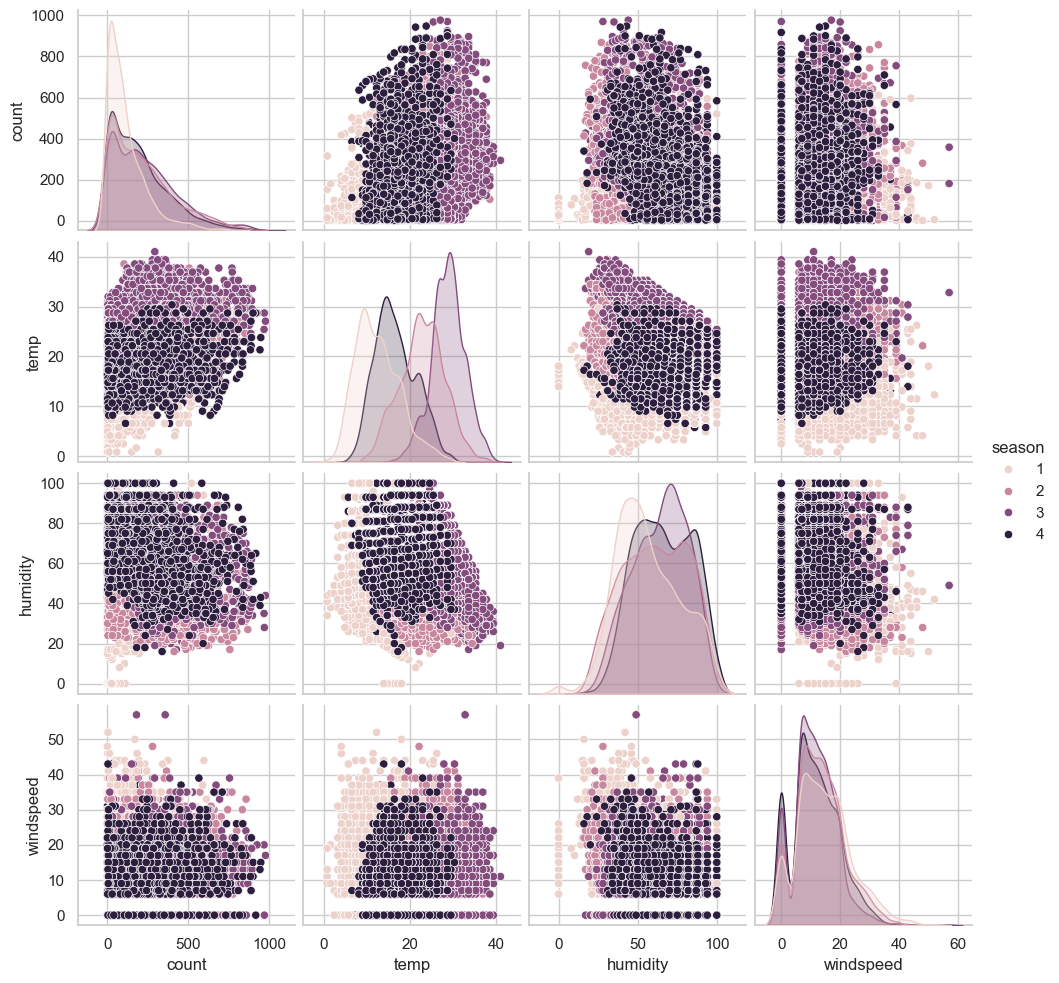

In [34]:
sns.pairplot(correlation2, hue="season")

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
   * Масив точок, що явно тягнеться вздовж умовної лінії як на мене прослідковується у поєднання **temp|count** , також count|humidity наче хоче забитись в куток тим самим показує нам негативний лінійний зв'язок.
2. Яка характеристика найбільше змінюється від сезону?
   * Для відповіді на це питання варто звернути увагу на гістограми, що ми маємо в нашій матриці графіків, добре видн, що гістограми розподілу значень залежно ві сезону майже завжди накладаютьмя одне на одного, десь більше десь менше, окрім **temp** - тут гістограми мають найменшу площу перетину між сезонами, саме це вказує на відмінність значень , що містяться в нашій базі , саме ця характеристика найбільш змінна відносно сезону .

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

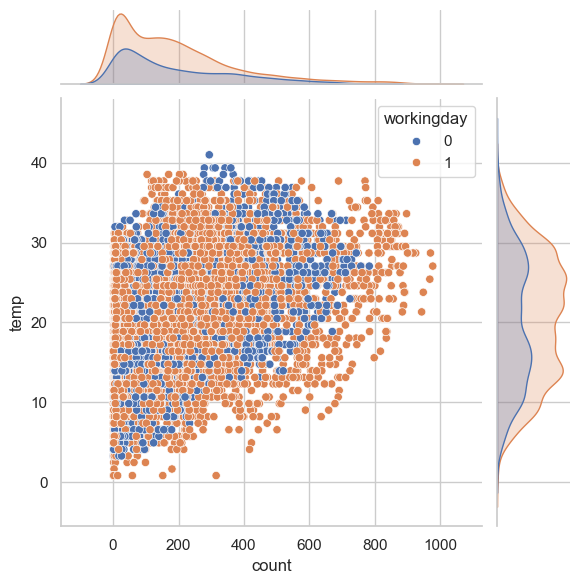

In [40]:
sns.jointplot(data=df, x='count', y='temp', hue='workingday')

**Питання для інтерпретації:**
1. Що показують графіки по краях?
   * Розподіл данних (зверху) рохподіл кількості оренд синім в неробочі дні, помаранчевим в робочі, бачисо , що гістограми неоднакової іорми тобото робочий чи вихідний день впливає на розподіл. а от щодо гістограми (справа) розподілу температури бачимо що данні вихідних повторюють форму данних в будні дні, тобто це підтверджує, що день тижня не залежить від температури. вона розподіляється однаково незалежно від дня тижня.
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?
   * Загальна динаміка позитивна відносно температури, щодо робочих днів, помітно , що кількість поїздок в робочі дні значно вища ніж у вихідні, незалежно від температури(бо значення температури в робочі дні і неробочі і кількість поїздок знаходяться в одному місця на графіку, а ось саме кількість поїздок значно випереджає), це на мою думку підтврджує попередні висновки про постіних зареєстрованих користувачів які користуються сервісом для поїздок на роботу.